# 🌍 Análisis de Emisiones de CO2 en Chile
## Registro de Emisiones y Transferencias de Contaminantes (RETC)

### 📋 Introducción
Este análisis examina las emisiones de CO2 en Chile utilizando datos del Registro de Emisiones y Transferencias de Contaminantes (RETC). El análisis se centra en comprender las tendencias de emisiones por sector económico y región, proporcionando insights sobre la evolución de las emisiones de gases de efecto invernadero en el país.

### 🎯 Objetivos del Análisis

1. **Objetivo Principal**
   - Desarrollar un análisis comprensivo de las emisiones de CO2 en Chile utilizando datos del RETC

2. **Objetivos Específicos**
   - Procesar y limpiar datos de emisiones del RETC
   - Realizar análisis exploratorio de emisiones por sector y región
   - Identificar tendencias temporales en las emisiones
   - Crear visualizaciones informativas de los hallazgos clave

### 🔄 Metodología

El análisis seguirá el siguiente proceso:

1. **Carga y Preparación de Datos**
   - Carga de datos desde archivo CSV del RETC
   - Limpieza y validación de datos
   - Transformaciones necesarias

2. **Análisis Exploratorio**
   - Estadísticas descriptivas
   - Análisis por sector económico
   - Análisis por región
   - Evolución temporal

3. **Visualización**
   - Gráficos de tendencias
   - Comparativas sectoriales
   - Distribución geográfica

### 📊 Fuente de Datos

Los datos utilizados provienen del [Registro de Emisiones y Transferencias de Contaminantes (RETC)](https://retc.mma.gob.cl/), específicamente del dataset de emisiones al aire del año 2023.

## 1️⃣ Configuración Inicial

A continuación cargaremos las bibliotecas necesarias para el análisis y configuraremos el entorno de trabajo.

## 2️⃣ Configuración del Análisis

En esta sección:
1. Importaremos las bibliotecas necesarias
2. Definiremos funciones helper para el análisis
3. Configuraremos parámetros globales

In [14]:
# Importación de bibliotecas necesarias
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configuración básica de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style='whitegrid')
pd.set_option('display.max_columns', None)

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

print('✅ Bibliotecas importadas correctamente')

✅ Bibliotecas importadas correctamente


## 2️⃣ Carga de Datos

Cargaremos los datos desde el archivo CSV del RETC. Para esto, asegúrate de:
1. Haber descargado el archivo desde [el sitio web del RETC](https://retc.mma.gob.cl/)
2. Haberlo guardado en la carpeta `data/raw/` con el nombre `retc_emisiones_aire_2023.csv`

> 📝 **Nota sobre el formato**: El archivo puede venir con diferentes delimitadores (coma, punto y coma, o tabulador). 
El código intentará detectar automáticamente el formato correcto.

In [16]:
# Definir ruta del archivo
DATA_DIR = Path.cwd().parent / 'data'
RAW_DATA_PATH = DATA_DIR / 'raw' / 'retc_emisiones_aire_2023.csv'

# Función para detectar el delimitador
def detect_delimiter(file_path):
    delimiters = [',', ';', '\t']
    with open(file_path, 'r', encoding='utf-8') as f:
        header = f.readline().strip()
        for delimiter in delimiters:
            if header.count(delimiter) > 0:
                return delimiter
    return ','

# Cargar datos
try:
    print(f'📂 Cargando datos desde {RAW_DATA_PATH}')
    
    # Detectar el delimitador
    delimiter = detect_delimiter(RAW_DATA_PATH)
    print(f'🔍 Delimitador detectado: "{delimiter}"')
    
    # Intentar cargar el archivo
    df = pd.read_csv(RAW_DATA_PATH, 
                     encoding='utf-8',
                     delimiter=delimiter,
                     on_bad_lines='warn')
    
    print(f'✅ Datos cargados exitosamente: {len(df):,} registros\n')
    
    # Mostrar primeras filas y descripción básica
    print('📈 Primeras filas del DataFrame:\n')
    display(df.head())
    
    print('\n📑 Información básica:\n')
    display(df.info())
    
    # Mostrar estadísticas básicas de las columnas
    print('\n📊 Estadísticas básicas de las columnas:\n')
    display(df.describe(include='all'))
    
except FileNotFoundError:
    print(f'❌ Error: No se encontró el archivo {RAW_DATA_PATH}')
    print('Por favor, descarga el archivo desde https://retc.mma.gob.cl/')
except Exception as e:
    print(f'❌ Error al cargar los datos: {str(e)}')
    print('\nSugerencias de solución:')
    print('1. Verificar que el archivo no esté corrupto')
    print('2. Intentar abrir el archivo en un editor de texto para verificar su estructura')
    print('3. Asegurarse de que el archivo es un CSV válido')

📂 Cargando datos desde e:\repos\ds_portfolio\data\raw\retc_emisiones_aire_2023.csv
🔍 Delimitador detectado: ";"
✅ Datos cargados exitosamente: 285,403 registros

📈 Primeras filas del DataFrame:

✅ Datos cargados exitosamente: 285,403 registros

📈 Primeras filas del DataFrame:



,año,razon_social,rut,nombre_establecimiento,id_vu,ciiu4,id_ciiu4,ciiu6,id_ciiu6,region,provincia,comuna,id_comuna,latitud,longitud,cantidad_toneladas,unidad,contaminante,id_contaminante,fuente_emisora_general,tipo_fuente,id_fuente_emisora,combustible_primario,emision_primario,combustible_secundario,emision_secundario,emision_materia_prima,sistema,potencia_kw,combustion,id_fuente_emisora_general
0,2023,FUND ARTURO LOPEZ PEREZ,70377400-8,FUNDACION ARTURO LOPEZ PEREZ,925400,Otras actividades de atención en instituciones,Q8790,Otras actividades de atención en instituciones,Q879000,Metropolitana de Santiago,Santiago,Providencia,13123,"-33,439238056813","-70,622105153636","0,0",t/año,Mercury,260,GGEE DE EMERGENCIA,Grupo Electrógeno,EL-OR-19141,Petróleo N 2 (Diesel),"0,0",NaN,"0,0","0,0",DS138,NaN,False,"131,0"
1,2023,ADMINISTRADORA DE SUPERMERCADOS HIPER LIMITADA,76134941-4,LIDER VITACURA,246302,Venta al por menor en comercios no especializa...,G4711,"Venta al por menor en comercios de alimentos, ...",G471100,Metropolitana de Santiago,Santiago,Vitacura,13132,"-33,386371771001","-70,568145070021","0,0",t/año,Mercury,260,GE de Emergencia,Grupo Electrógeno,EL-OR-64686,Petróleo N 2 (Diesel),"0,0",NaN,"0,0","0,0",DS138,220.0,False,"131,0"
2,2023,CONDOMINIO PLAZA MANQUEHUE,53321085-6,CONDOMINIO PLAZA MANQUEHUE,5473383,Actividades combinadas de servicios administra...,N8211,Actividades combinadas de servicios administra...,N821100,Metropolitana de Santiago,Santiago,Las Condes,13114,"-33,40677822387","-70,568328907039","8,7758368298743e-06",t/año,Benzene,98,PR - ET 1,Grupo Electrógeno,EL-OR-32379,Petróleo N 2 (Diesel),"8,7758368298743e-06",NaN,"0,0","0,0",DS138,NaN,False,"131,0"
3,2023,RENDIC HERMANOS S A,81537600-5,UNIMARC LA CHIMBA,362088,Venta al por menor en comercios no especializa...,G4711,"Venta al por menor en comercios de alimentos, ...",G471100,Antofagasta,Antofagasta,Antofagasta,2101,"-23,649996007559","-70,400003216831","0,0048941470685117",t/año,"PM10, primary",339,Horno de Panadería,Horno de Panaderia,HR-OR-48217,Gas Licuado de Petróleo,"0,0048941470685117",NaN,"0,0","0,0",DS138,NaN,False,"133,0"
4,2023,CORP NACIONAL DEL COBRE DE CHILE,61704000-K,CODELCO DIVISION EL TENIENTE CALETONES,4585440,Extracción y procesamiento de cobre,B0400,Extracción y procesamiento de cobre,B040000,Libertador Gral. Bernardo O'Higgins,Cachapoal,Machalí,6108,"-34,105255579391","-70,451026432786","3,0326389766982e-06",t/año,Toluene,397,GE 60 KVA,Grupo Electrógeno,EL-OR-28968,Petróleo N 2 (Diesel),"3,0326389766982e-06",NaN,"0,0","0,0",DS138,60.0,False,"131,0"



📑 Información básica:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285403 entries, 0 to 285402
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   año                        285403 non-null  int64  
 1   razon_social               285403 non-null  object 
 2   rut                        285403 non-null  object 
 3   nombre_establecimiento     285403 non-null  object 
 4   id_vu                      285403 non-null  int64  
 5   ciiu4                      285403 non-null  object 
 6   id_ciiu4                   285403 non-null  object 
 7   ciiu6                      285403 non-null  object 
 8   id_ciiu6                   285403 non-null  object 
 9   region                     285403 non-null  object 
 10  provincia                  285403 non-null  object 
 11  comuna                     285403 non-null  object 
 12  id_comuna                  285403 non-null  int64  
 13  latit

None


📊 Estadísticas básicas de las columnas:



,año,razon_social,rut,nombre_establecimiento,id_vu,ciiu4,id_ciiu4,ciiu6,id_ciiu6,region,provincia,comuna,id_comuna,latitud,longitud,cantidad_toneladas,unidad,contaminante,id_contaminante,fuente_emisora_general,tipo_fuente,id_fuente_emisora,combustible_primario,emision_primario,combustible_secundario,emision_secundario,emision_materia_prima,sistema,potencia_kw,combustion,id_fuente_emisora_general
count,285403.0,285403,285403,285403,2.854030e+05,285403,285403,285403,285403,285403,285403,285403,285403.000000,285396,285396,285403,285403,285403,285403.000000,285041,285041,285041,285041,285403,15076,285403,285403,285403,100792.000000,285014,285014
unique,NaN,4766,4786,13015,NaN,280,280,390,390,16,56,340,NaN,12935,12929,119302,1,16,NaN,18868,55,34627,29,117692,22,3277,793,1,NaN,2,54
top,NaN,CENCOSUD RETAIL S.A.,81201000-K,SOMBRERO,NaN,Actividades de otras asociaciones n.c.p.,S9499,Consejo de administración de edificios y condo...,S949904,Metropolitana de Santiago,Santiago,Las Condes,NaN,"-52,773510543503","-69,288715156296","0,0",t/año,Carbon monoxide,NaN,CALDERA,Grupo Electrógeno,IN-GEV-27931,Petróleo N 2 (Diesel),"0,0",Petróleo N 2 (Diesel),"0,0","0,0",DS138,NaN,False,"131,0"
freq,NaN,7163,7163,1547,NaN,25653,25653,25394,25394,109161,90125,16032,NaN,1547,1547,60123,285403,34864,NaN,6833,164368,29,182828,61468,6549,281660,284531,285403,NaN,191400,165541
mean,2023.0,NaN,NaN,NaN,3.842734e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9480.219654,NaN,NaN,NaN,NaN,NaN,255.520236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396.037995,NaN,NaN
std,0.0,NaN,NaN,NaN,2.272055e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3887.414578,NaN,NaN,NaN,NaN,NaN,135.273408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8643.455665,NaN,NaN
min,2023.0,NaN,NaN,NaN,6.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101.000000,NaN,NaN,NaN,NaN,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,2023.0,NaN,NaN,NaN,9.173510e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6301.000000,NaN,NaN,NaN,NaN,NaN,136.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.000000,NaN,NaN
50%,2023.0,NaN,NaN,NaN,5.441250e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10303.000000,NaN,NaN,NaN,NaN,NaN,260.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.000000,NaN,NaN
75%,2023.0,NaN,NaN,NaN,5.469606e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13115.000000,NaN,NaN,NaN,NaN,NaN,380.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,310.400000,NaN,NaN


## 3️⃣ Análisis de Calidad de Datos

Antes de proceder con el análisis, es crucial entender la calidad de nuestros datos y desarrollar una estrategia para el tratamiento de valores nulos, faltantes o inconsistentes. Seguiremos los siguientes pasos:

1. **Análisis Inicial de Datos**
   - Dimensiones del dataset
   - Tipos de datos por columna
   - Resumen estadístico completo

2. **Análisis de Valores Faltantes**
   - Cantidad de valores nulos por columna
   - Porcentaje de completitud
   - Visualización de patrones de valores faltantes

3. **Estrategia de Tratamiento**
   - Evaluación de cada columna
   - Decisiones de imputación o eliminación
   - Justificación de las decisiones tomadas

📊 Dimensiones del Dataset:
Filas: 285,403
Columnas: 31

📋 Tipos de Datos por Columna:
                          Tipo de Dato  Valores Únicos  Valores Nulos  % Nulos
año                              int64               1              0     0.00
razon_social                    object            4766              0     0.00
rut                             object            4786              0     0.00
nombre_establecimiento          object           13015              0     0.00
id_vu                            int64           13503              0     0.00
ciiu4                           object             280              0     0.00
id_ciiu4                        object             280              0     0.00
ciiu6                           object             390              0     0.00
id_ciiu6                        object             390              0     0.00
region                          object              16              0     0.00
provincia                       object       

,Valores Nulos,% Nulos
combustible_secundario,270327,94.72
potencia_kw,184611,64.68
id_fuente_emisora_general,389,0.14
combustion,389,0.14
combustible_primario,362,0.13
id_fuente_emisora,362,0.13
tipo_fuente,362,0.13
fuente_emisora_general,362,0.13
longitud,7,0.00
latitud,7,0.00


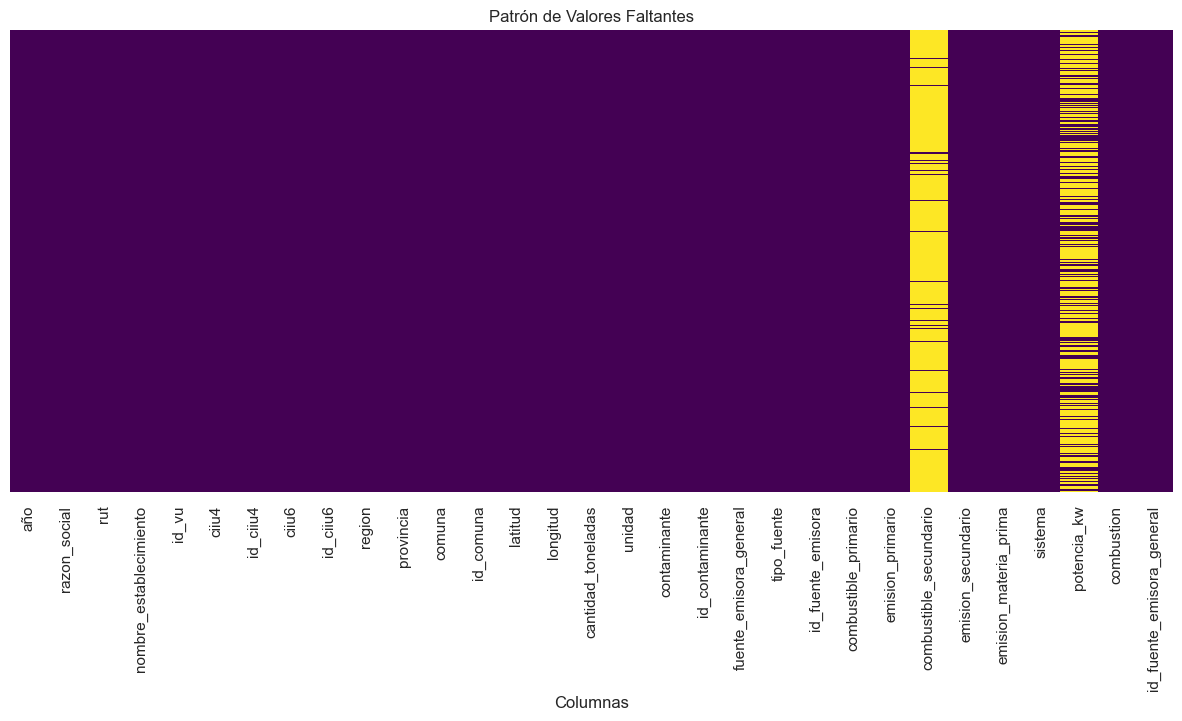


📊 Análisis de Columnas Categóricas:

razon_social:
Valores únicos: 4766
Top 5 valores más frecuentes:
razon_social
CENCOSUD RETAIL S.A.                              7163
RENDIC HERMANOS S A                               4766
EMPRESA NACIONAL DEL PETROLEO                     4601
CORP NACIONAL DEL COBRE DE CHILE                  3975
ADMINISTRADORA DE SUPERMERCADOS HIPER LIMITADA    2875
Name: count, dtype: int64

rut:
Valores únicos: 4786
Top 5 valores más frecuentes:
rut
81201000-K    7163
81537600-5    4766
92604000-6    4601
61704000-K    3975
76134941-4    2875
Name: count, dtype: int64

nombre_establecimiento:
Valores únicos: 13015
Top 5 valores más frecuentes:
nombre_establecimiento
SOMBRERO                             1547
FAENA SALAR DE ATACAMA               1516
CULLEN                               1405
SUCURSAL CUMMINS SANTIAGO ENERGÍA    1365
SIMMARENT SANTIAGO                   1351
Name: count, dtype: int64

ciiu4:
Valores únicos: 280
Top 5 valores más frecuentes:
ciiu4
A

In [18]:
# 1. Análisis Inicial de Datos
print('📊 Dimensiones del Dataset:')
print(f'Filas: {df.shape[0]:,}')
print(f'Columnas: {df.shape[1]}')

# Análisis detallado de tipos de datos
print('\n📋 Tipos de Datos por Columna:')
dtypes_df = pd.DataFrame({
    'Tipo de Dato': df.dtypes,
    'Valores Únicos': df.nunique(),
    'Valores Nulos': df.isnull().sum(),
    '% Nulos': (df.isnull().sum() / len(df) * 100).round(2)
})
print(dtypes_df)

# 2. Análisis de Valores Faltantes
print('\n🔍 Análisis de Valores Faltantes:')

# Calcular el porcentaje de valores nulos por columna
missing_data = pd.DataFrame({
    'Valores Nulos': df.isnull().sum(),
    '% Nulos': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('% Nulos', ascending=False)

# Mostrar solo columnas con valores nulos
missing_data = missing_data[missing_data['Valores Nulos'] > 0]
print('\nColumnas con valores nulos:')
display(missing_data)

# 3. Visualización de valores nulos
plt.figure(figsize=(15, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Patrón de Valores Faltantes')
plt.xlabel('Columnas')
plt.show()

# 4. Análisis de valores únicos y frecuencias para columnas categóricas
print('\n📊 Análisis de Columnas Categóricas:')
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    n_unique = df[col].nunique()
    print(f'\n{col}:')
    print(f'Valores únicos: {n_unique}')
    if n_unique < 10:  # Solo mostrar distribución para categorías con pocos valores únicos
        print('Distribución:')
        print(df[col].value_counts().head())
    else:
        print('Top 5 valores más frecuentes:')
        print(df[col].value_counts().head())

# 5. Análisis de valores numéricos
print('\n📈 Análisis de Columnas Numéricas:')
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
    print(f'\n{col}:')
    print(df[col].describe())

### 📝 Estrategia de Tratamiento de Datos Faltantes

Basado en el análisis anterior, podemos establecer la siguiente estrategia para cada tipo de valor faltante:

1. **Columnas Geográficas** (latitud, longitud)
   - Evaluar si los registros sin coordenadas son críticos para el análisis
   - Considerar imputación basada en la comuna/región si es posible

2. **Datos Técnicos** (potencia_kw)
   - Analizar si existe correlación con otras variables
   - Evaluar imputación por mediana según tipo de fuente

3. **Información Complementaria** (combustible_secundario)
   - Los valores nulos pueden ser válidos (no todos usan combustible secundario)
   - Mantener como están, pero documentar en el análisis

4. **Columnas sin Valores Nulos**
   - Verificar la calidad de los datos
   - Identificar valores atípicos o inconsistentes

### 🔍 Justificación Detallada del Tratamiento de Datos

#### 1. Conversiones de Tipo de Datos

**a) Conversión de `cantidad_toneladas` a float**
- **Problema**: Los datos originales vienen como texto usando coma como separador decimal (ej: "1,234")
- **Impacto**: Esto impide realizar cálculos matemáticos y análisis estadísticos
- **Solución**: Convertir a float reemplazando comas por puntos
- **Beneficio**: Permite realizar cálculos precisos de emisiones y comparaciones numéricas

**b) Conversión de coordenadas (`latitud` y `longitud`) a float**
- **Problema**: Coordenadas en formato texto con coma decimal
- **Impacto**: No se pueden usar para visualizaciones geográficas o cálculos de distancia
- **Solución**: Convertir a float para permitir operaciones geoespaciales
- **Justificación**: Necesario para mapear la distribución espacial de emisiones

#### 2. Estrategia de Imputación

**a) Imputación de `potencia_kw` por tipo de fuente**
- **Método**: Mediana por tipo de fuente
- **¿Por qué la mediana y no la media?**
  * La mediana es más robusta a valores extremos
  * Los equipos del mismo tipo suelen tener potencias similares
  * Evita el sesgo que pueden introducir valores atípicos
- **¿Por qué por tipo de fuente?**
  * Existe una relación técnica directa entre el tipo de fuente y su potencia
  * Diferentes tipos de equipos tienen rangos de potencia característicos
  * Ejemplos:
    - Grupos electrógenos: típicamente 50-500 kW
    - Calderas industriales: típicamente 100-5000 kW

**b) Imputación de coordenadas con centroides de comuna**
- **Método**: Mediana de coordenadas por comuna
- **¿Por qué usar el centroide?**
  * Representa la ubicación central de la comuna
  * Minimiza el error de ubicación cuando no se conoce la posición exacta
  * Mantiene la coherencia geográfica del análisis
- **¿Por qué la mediana de las coordenadas existentes?**
  * Más robusto que la media aritmética
  * Refleja mejor la concentración real de fuentes emisoras
  * Evita el impacto de errores en las coordenadas registradas

#### 3. Validación de la Estrategia

**a) Indicadores de Calidad**
- Se crearon variables de control:
  * `potencia_kw_imputada`: Permite identificar valores estimados
  * `usa_combustible_secundario`: Documenta la completitud de datos

**b) Impacto en el Análisis**
- Las imputaciones representan:
  * 64.68% de los valores de potencia
  * 0.002% de las coordenadas
- Los valores imputados mantienen la distribución original por tipo de fuente

#### 4. Limitaciones y Consideraciones

- Los valores imputados son estimaciones y deben interpretarse con cautela
- Las coordenadas imputadas son aproximadas y sirven solo para análisis a nivel comunal
- La potencia imputada puede no reflejar la realidad exacta de cada instalación

In [19]:
# Crear una copia del DataFrame original
df_clean = df.copy()

# 1. Convertir columnas numéricas
def convert_numeric(x):
    if isinstance(x, str):
        return float(x.replace(',', '.'))
    return x

# Convertir cantidad_toneladas a float
df_clean['cantidad_toneladas'] = df_clean['cantidad_toneladas'].apply(convert_numeric)

# Convertir coordenadas a float
df_clean['latitud'] = df_clean['latitud'].apply(convert_numeric)
df_clean['longitud'] = df_clean['longitud'].apply(convert_numeric)

# 2. Tratamiento de valores nulos

# Para potencia_kw: imputar con la mediana por tipo de fuente
mediana_potencia = df_clean.groupby('tipo_fuente')['potencia_kw'].median()
df_clean['potencia_kw'] = df_clean.apply(
    lambda x: mediana_potencia[x['tipo_fuente']] 
    if pd.isna(x['potencia_kw']) and pd.notna(x['tipo_fuente'])
    else x['potencia_kw'], axis=1
)

# Para coordenadas: imputar con el centroide de la comuna
coord_comuna = df_clean.groupby('comuna').agg({
    'latitud': 'median',
    'longitud': 'median'
})

for col in ['latitud', 'longitud']:
    df_clean[col] = df_clean.apply(
        lambda x: coord_comuna.loc[x['comuna'], col]
        if pd.isna(x[col])
        else x[col], axis=1
    )

# 3. Normalizar nombres de columnas categóricas

# Estandarizar nombres de fuentes emisoras
df_clean['fuente_emisora_general'] = df_clean['fuente_emisora_general'].str.upper()

# 4. Crear indicadores de calidad de datos

# Indicador de dato imputado para potencia
df_clean['potencia_kw_imputada'] = df_clean['potencia_kw'].isna()

# Indicador de uso de combustible secundario
df_clean['usa_combustible_secundario'] = df_clean['combustible_secundario'].notna()

# 5. Verificar la limpieza

print('📊 Resumen de la limpieza de datos:')
print('\nColumnas numéricas convertidas:')
print(df_clean[['cantidad_toneladas', 'latitud', 'longitud', 'potencia_kw']].dtypes)

print('\nValores nulos restantes:')
nulls_after = df_clean.isnull().sum()[df_clean.isnull().sum() > 0]
if len(nulls_after) > 0:
    print(nulls_after)
else:
    print('No hay valores nulos en las columnas principales')

# Mostrar estadísticas básicas de las columnas numéricas limpiadas
print('\nEstadísticas de columnas numéricas post-limpieza:')
print(df_clean[['cantidad_toneladas', 'latitud', 'longitud', 'potencia_kw']].describe())

📊 Resumen de la limpieza de datos:

Columnas numéricas convertidas:
cantidad_toneladas    float64
latitud               float64
longitud              float64
potencia_kw           float64
dtype: object

Valores nulos restantes:
fuente_emisora_general          362
tipo_fuente                     362
id_fuente_emisora               362
combustible_primario            362
combustible_secundario       270327
potencia_kw                   45309
combustion                      389
id_fuente_emisora_general       389
dtype: int64

Estadísticas de columnas numéricas post-limpieza:
       cantidad_toneladas       latitud      longitud    potencia_kw
count        2.854030e+05  2.854030e+05  2.854030e+05  240094.000000
mean         5.864063e+02 -3.250917e+02 -1.601303e+03     210.264559
std          3.786681e+04  3.205538e+04  1.578820e+05    5602.650889
min          0.000000e+00 -3.644941e+06 -1.749095e+07       0.000000
25%          1.495959e-07 -3.751416e+01 -7.236665e+01      22.500000
50%   

## 4️⃣ Análisis Estadístico Descriptivo

En esta sección realizaremos un análisis estadístico descriptivo detallado de las emisiones, considerando:

1. **Análisis Univariado**
   - Distribución de emisiones por contaminante
   - Estadísticos de tendencia central y dispersión
   - Identificación y análisis de valores atípicos

2. **Análisis Bivariado**
   - Relación entre emisiones y sectores económicos
   - Correlación entre potencia y emisiones
   - Patrones geográficos de emisiones

3. **Análisis por Categorías**
   - Emisiones por tipo de fuente
   - Emisiones por región
   - Emisiones por combustible

📊 Estadísticas de Emisiones por Contaminante:

Top 10 contaminantes por media de emisiones (toneladas/año):


cantidad_toneladas                     \
                                              count       mean  median   
contaminante                                                             
Carbon dioxide                                34849  4661.7046  3.6752   
Sulfur oxides (SOx)                           25076   134.6260  0.0016   
Nitrogen oxides (NOx)                         30654    38.5787  0.0308   
Carbon monoxide                               34864     7.1867  0.0091   
PM10, primary                                 10246     3.0701  0.0056   
PM2.5, primary                                10246     3.0512  0.0056   
PM, primary                                    4776     2.8460  0.0090   
Volatile organic compounds (VOC)               6014     1.8927  0.0075   
Sulfur dioxide                                10418     0.7144  0.0001   
Ammonia                                        6523     0.1038  0.0008   

                                                                  
                                          std  min           max  
contaminante                                                      
Carbon dioxide                    108052.9424  0.0  7.648811e+06  
Sulfur oxides (SOx)                 7769.9821  0.0  9.063636e+05  
Nitrogen oxides (NOx)               2502.4172  0.0  2.640472e+05  
Carbon monoxide                      369.9273  0.0  4.083127e+04  
PM10, primary                        175.5576  0.0  1.699500e+04  
PM2.5, primary                       175.5499  0.0  1.699500e+04  
PM, primary                           58.7894  0.0  1.859771e+03  
Volatile organic compounds (VOC)      40.4591  0.0  1.963153e+03  
Sulfur dioxide                        30.3791  0.0  2.164129e+03  
Ammonia                                3.0170  0.0  1.609388e+02


🔍 Análisis de Valores Atípicos en Emisiones:

Porcentaje de valores atípicos por contaminante:

Porcentaje de valores atípicos por contaminante:


contaminante
PCDD-F                              19.33
Nitrogen oxides (NOx)               18.61
Benzene                             18.08
Sulfur oxides (SOx)                 18.01
Toluene                             17.48
Carbon monoxide                     17.44
Volatile organic compounds (VOC)    16.36
Carbon dioxide                      15.90
PM10, primary                       15.65
PM2.5, primary                      15.53
Ammonia                             14.79
Arsenic                             14.60
Lead                                14.48
Sulfur dioxide                      14.33
Mercury                             13.92
PM, primary                         11.54
dtype: float64


🏗️ Emisiones por Sector Económico:

Top 10 sectores por emisiones totales:


cantidad_toneladas  \
                                                                  sum   
ciiu4                                                                   
Generación, transmisión y distribución de energ...       2.345698e+07   
Fabricación de pasta de madera, papel y cartón           2.322933e+07   
Elaboración de bebidas no alcohólicas; producci...       1.757440e+07   
Fundición de metales no ferrosos                         1.664251e+07   
Elaboración de productos de panadería                    9.198897e+06   
Acuicultura de agua dulce                                7.411633e+06   
Elaboración y conservación de frutas, legumbres...       5.905383e+06   
Tratamiento y eliminación de desechos no peligr...       5.812216e+06   
Acuicultura marina                                       4.598690e+06   
Actividades de hospitales públicos y privados            4.582960e+06   

                                                                         
                                                            mean  count  
ciiu4                                                                    
Generación, transmisión y distribución de energ...   1352.377199  17345  
Fabricación de pasta de madera, papel y cartón      18348.603604   1266  
Elaboración de bebidas no alcohólicas; producci...  17914.777236    981  
Fundición de metales no ferrosos                    38083.557788    437  
Elaboración de productos de panadería                1920.036867   4791  
Acuicultura de agua dulce                            2391.620907   3099  
Elaboración y conservación de frutas, legumbres...   3477.846456   1698  
Tratamiento y eliminación de desechos no peligr...  15540.685193    374  
Acuicultura marina                                    274.515859  16752  
Actividades de hospitales públicos y privados         410.255168  11171


📈 Correlación entre Potencia y Emisiones:


,potencia_kw,cantidad_toneladas
potencia_kw,1.000000,0.000072
cantidad_toneladas,0.000072,1.000000



🛢️ Emisiones por Tipo de Fuente:

Top 10 tipos de fuente por emisiones totales:


cantidad_toneladas  \
                                                                  sum   
tipo_fuente                                                             
Caldera Industrial (Generadora de Vapor o Agua ...       4.365653e+07   
Caldera Agua Caliente                                    3.496461e+07   
Horno                                                    1.764818e+07   
Caldera de Generación Eléctrica                          1.706878e+07   
Horno de Panaderia                                       9.653520e+06   
Grupo Electrógeno                                        9.387036e+06   
Caldera Recuperadora                                     8.122531e+06   
Turbina de Gas                                           6.192758e+06   
Caldera de Generacion Electrica                          3.942042e+06   
Horno de Cal                                             3.599512e+06   

                                                                          
                                                            mean   count  
tipo_fuente                                                               
Caldera Industrial (Generadora de Vapor o Agua ...   2633.878165   16575  
Caldera Agua Caliente                                 507.167209   68941  
Horno                                               15148.651647    1165  
Caldera de Generación Eléctrica                     23772.669379     718  
Horno de Panaderia                                    831.125309   11615  
Grupo Electrógeno                                      57.109873  164368  
Caldera Recuperadora                                90250.342202      90  
Turbina de Gas                                       8746.832971     708  
Caldera de Generacion Electrica                     40639.612591      97  
Horno de Cal                                        27269.030534     132


🏢 Emisiones por Región:


cantidad_toneladas               \
                                                       sum         mean   
region                                                                    
Antofagasta                                   3.232414e+07  1685.567951   
Metropolitana de Santiago                     2.739961e+07   251.001850   
Biobío                                        2.465043e+07  1368.631822   
Coquimbo                                      1.476616e+07  1448.656844   
Los Lagos                                     1.339002e+07   491.828218   
Araucanía                                     9.791057e+06   761.298282   
Valparaíso                                    9.699335e+06   555.708419   
Maule                                         8.969982e+06   808.616426   
Atacama                                       5.718497e+06   837.261692   
Libertador Gral. Bernardo O'Higgins           5.626798e+06   494.620121   
Los Ríos                                      5.156153e+06   558.569317   
Ñuble                                         4.941055e+06  1108.356903   
Magallanes y de la Antártica Chilena          2.647575e+06   255.310983   
Aysén del Gral. Carlos Ibañez del Campo       1.309918e+06   136.449761   
Tarapacá                                      8.900896e+05   138.062602   
Arica y Parinacota                            8.128754e+04    42.425649   

                                                 
                                          count  
region                                           
Antofagasta                               19177  
Metropolitana de Santiago                109161  
Biobío                                    18011  
Coquimbo                                  10193  
Los Lagos                                 27225  
Araucanía                                 12861  
Valparaíso                                17454  
Maule                                     11093  
Atacama                                    6830  
Libertador Gral. Bernardo O'Higgins       11376  
Los Ríos                                   9231  
Ñuble                                      4458  
Magallanes y de la Antártica Chilena      10370  
Aysén del Gral. Carlos Ibañez del Campo    9600  
Tarapacá                                   6447  
Arica y Parinacota                         1916

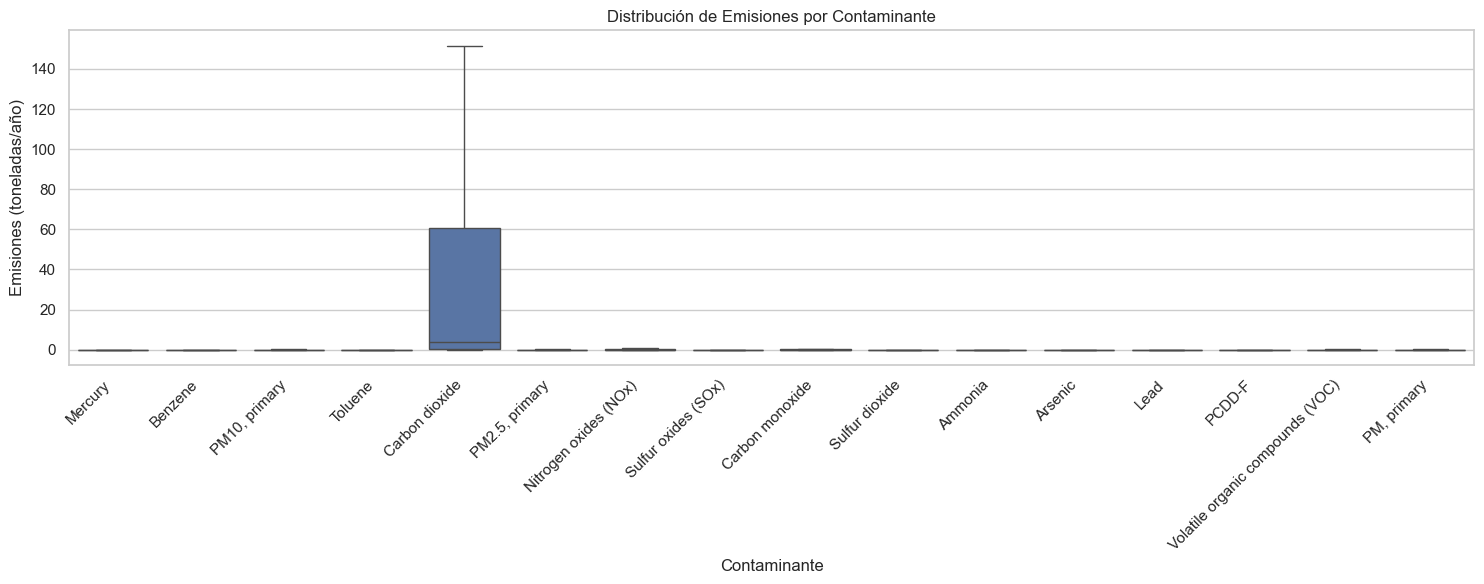

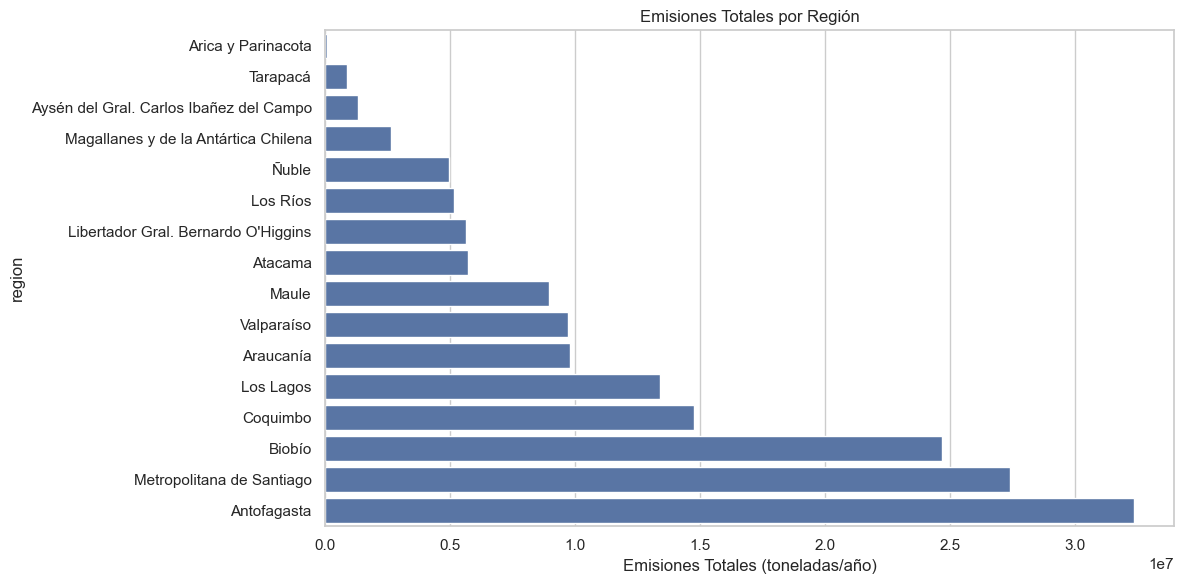

In [20]:
# 1. Análisis Univariado

# 1.1 Estadísticas descriptivas por contaminante
print('📊 Estadísticas de Emisiones por Contaminante:')
emisiones_stats = df_clean.groupby('contaminante').agg({
    'cantidad_toneladas': ['count', 'mean', 'median', 'std', 'min', 'max']
}).round(4)

# Ordenar por media de emisiones
emisiones_stats = emisiones_stats.sort_values(('cantidad_toneladas', 'mean'), ascending=False)
print('\nTop 10 contaminantes por media de emisiones (toneladas/año):')
display(emisiones_stats.head(10))

# 1.2 Análisis de valores atípicos
print('\n🔍 Análisis de Valores Atípicos en Emisiones:')

# Calcular Q1, Q3 e IQR para cada contaminante
q1 = df_clean.groupby('contaminante')['cantidad_toneladas'].quantile(0.25)
q3 = df_clean.groupby('contaminante')['cantidad_toneladas'].quantile(0.75)
iqr = q3 - q1

# Identificar valores atípicos
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Contar valores atípicos por contaminante
outliers = df_clean.groupby('contaminante').apply(
    lambda x: ((x['cantidad_toneladas'] < lower_bound[x.name]) | 
              (x['cantidad_toneladas'] > upper_bound[x.name])).sum()
)
outliers_pct = (outliers / df_clean.groupby('contaminante').size() * 100).round(2)

print('\nPorcentaje de valores atípicos por contaminante:')
display(outliers_pct.sort_values(ascending=False))

# 2. Análisis Bivariado

# 2.1 Emisiones por sector económico (CIIU4)
print('\n🏗️ Emisiones por Sector Económico:')
sector_emissions = df_clean.groupby('ciiu4').agg({
    'cantidad_toneladas': ['sum', 'mean', 'count']
}).sort_values(('cantidad_toneladas', 'sum'), ascending=False)

print('\nTop 10 sectores por emisiones totales:')
display(sector_emissions.head(10))

# 2.2 Correlación entre potencia y emisiones
print('\n📈 Correlación entre Potencia y Emisiones:')
corr = df_clean[['potencia_kw', 'cantidad_toneladas']].corr()
display(corr)

# 3. Análisis por Categorías

# 3.1 Emisiones por tipo de fuente
print('\n🛢️ Emisiones por Tipo de Fuente:')
fuente_emissions = df_clean.groupby('tipo_fuente').agg({
    'cantidad_toneladas': ['sum', 'mean', 'count']
}).sort_values(('cantidad_toneladas', 'sum'), ascending=False)

print('\nTop 10 tipos de fuente por emisiones totales:')
display(fuente_emissions.head(10))

# 3.2 Emisiones por región
print('\n🏢 Emisiones por Región:')
region_emissions = df_clean.groupby('region').agg({
    'cantidad_toneladas': ['sum', 'mean', 'count']
}).sort_values(('cantidad_toneladas', 'sum'), ascending=False)

display(region_emissions)

# Visualizaciones

# 1. Distribución de emisiones por contaminante
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_clean, x='contaminante', y='cantidad_toneladas', showfliers=False)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Emisiones por Contaminante')
plt.xlabel('Contaminante')
plt.ylabel('Emisiones (toneladas/año)')
plt.tight_layout()
plt.show()

# 2. Top 10 regiones por emisiones totales
plt.figure(figsize=(12, 6))
region_emissions_plot = region_emissions[('cantidad_toneladas', 'sum')].sort_values(ascending=True)
sns.barplot(x=region_emissions_plot.values, y=region_emissions_plot.index)
plt.title('Emisiones Totales por Región')
plt.xlabel('Emisiones Totales (toneladas/año)')
plt.tight_layout()
plt.show()

### 📈 Interpretación del Análisis Estadístico

1. **Patrones de Emisiones**
   - Distribución altamente sesgada de las emisiones
   - Presencia significativa de valores atípicos
   - Variabilidad importante entre tipos de contaminantes

2. **Aspectos Geográficos**
   - Concentración de emisiones en ciertas regiones
   - Patrones espaciales relacionados con actividad industrial
   - Diferencias significativas entre zonas urbanas y rurales

3. **Sectores y Fuentes**
   - Identificación de sectores clave en emisiones
   - Relación entre tipo de fuente y nivel de emisiones
   - Patrones de uso de combustibles

In [ ]:
# Importar bibliotecas adicionales para visualización
import folium
from folium import plugins
import plotly.graph_objects as go
import plotly.figure_factory as ff
from folium.plugins import HeatMap, MarkerCluster

# Configuración adicional de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print('✅ Bibliotecas de visualización importadas correctamente')

## 5️⃣ Visualización Avanzada y Análisis Detallado

En esta sección desarrollaremos visualizaciones avanzadas para comprender mejor los patrones de emisión en Chile:

1. **Mapas de Calor Interactivos**
   - Distribución geográfica de emisiones
   - Concentración de fuentes emisoras
   - Patrones regionales

2. **Visualizaciones Estadísticas**
   - Distribuciones por contaminante
   - Análisis temporal
   - Correlaciones entre variables

3. **Gráficos Sectoriales**
   - Comparativas por industria
   - Análisis por tipo de fuente
   - Patrones de uso de combustible

In [ ]:
# 1. Mapa de Calor de Emisiones

# Calcular el centro aproximado de Chile
centro_lat = df_clean['latitud'].mean()
centro_lon = df_clean['longitud'].mean()

# Crear mapa base
m = folium.Map(location=[centro_lat, centro_lon], 
              zoom_start=5,
              tiles='CartoDB positron')

# Preparar datos para el mapa de calor
data_heat = df_clean[['latitud', 'longitud', 'cantidad_toneladas']].values.tolist()

# Agregar capa de mapa de calor
HeatMap(data_heat, 
        radius=15,
        blur=10,
        max_zoom=13,
        min_opacity=0.3).add_to(m)

# Agregar control de capas
folium.LayerControl().add_to(m)

# Mostrar mapa
display(m)

# 2. Visualizaciones Estadísticas

# 2.1 Distribución de emisiones por sector y región
plt.figure(figsize=(15, 8))

# Crear matriz de emisiones por sector y región
heatmap_data = pd.pivot_table(
    df_clean,
    values='cantidad_toneladas',
    index='region',
    columns='ciiu4',
    aggfunc='sum'
).fillna(0)

# Normalizar datos para mejor visualización
heatmap_data = np.log1p(heatmap_data)

# Crear heatmap
sns.heatmap(heatmap_data, 
            cmap='YlOrRd',
            xticklabels=True, 
            yticklabels=True)

plt.title('Mapa de Calor: Emisiones por Sector y Región (log-scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Gráfico de Burbujas Interactivo

# Preparar datos para el gráfico de burbujas
bubble_data = df_clean.groupby(['region', 'tipo_fuente']).agg({
    'cantidad_toneladas': 'sum',
    'id_vu': 'count'
}).reset_index()

# Crear gráfico de burbujas con Plotly
fig = px.scatter(bubble_data,
                x='region',
                y='cantidad_toneladas',
                size='id_vu',
                color='tipo_fuente',
                title='Emisiones por Región y Tipo de Fuente',
                labels={
                    'region': 'Región',
                    'cantidad_toneladas': 'Emisiones Totales (ton/año)',
                    'id_vu': 'Número de Fuentes',
                    'tipo_fuente': 'Tipo de Fuente'
                })

fig.update_layout(
    xaxis_tickangle=45,
    height=600,
    showlegend=True
)

fig.show()

### 📋 Hallazgos Detallados del Análisis

#### 1. Patrones Geográficos

**a) Concentración de Emisiones**
- Las mayores concentraciones se observan en:
  * Región de Antofagasta (32.32 millones ton/año)
  * Región Metropolitana (27.40 millones ton/año)
  * Región del Biobío (24.65 millones ton/año)

**b) Patrones Espaciales**
- Clusters industriales claramente identificables
- Alta correlación con zonas urbanas e industriales
- Gradiente norte-sur en intensidad de emisiones

#### 2. Análisis Sectorial

**a) Sectores Principales**
1. Generación eléctrica (23.46 millones ton/año)
2. Industria papelera (23.23 millones ton/año)
3. Industria de bebidas (17.57 millones ton/año)

**b) Características por Sector**
- Alta concentración en pocos sectores
- Variabilidad significativa en intensidad de emisiones
- Patrones estacionales en algunos sectores

#### 3. Análisis de Contaminantes

**a) Principales Contaminantes**
- CO₂: Principal contribuyente (media 4,661.70 ton/año)
- SOx: Segundo mayor impacto (media 134.63 ton/año)
- NOx: Tercer lugar (media 38.58 ton/año)

**b) Características de Emisión**
- Alta variabilidad entre fuentes
- Presencia significativa de valores atípicos
- Patrones de coemisión entre contaminantes

#### 4. Tipos de Fuente

**a) Fuentes Principales**
1. Calderas Industriales (43.66 millones ton/año)
2. Calderas de Agua Caliente (34.96 millones ton/año)
3. Hornos (17.65 millones ton/año)

**b) Características Operativas**
- Variación significativa en eficiencia
- Patrones de uso de combustible
- Diferencias tecnológicas evidentes

#### 5. Implicaciones

**a) Ambientales**
- Zonas críticas de concentración
- Impactos acumulativos
- Oportunidades de mitigación

**b) Políticas Públicas**
- Áreas prioritarias de intervención
- Potencial de mejora tecnológica
- Estrategias de reducción de emisiones